<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(0_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,95.837048,84.555665,-2.325904,188.066809,190.629307,-2.562497
1,0.0,1.0,54.687300,89.661273,-9.263972,145.084601,150.861718,-5.777117
2,0.0,2.0,69.593435,81.697977,-1.766258,159.525155,159.595739,-0.070584
3,0.0,3.0,79.988111,94.506114,0.341017,184.835242,182.719002,2.116239
4,0.0,4.0,77.602661,99.327322,-0.314851,186.615133,184.611468,2.003665
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,74.551467,98.351700,-4.165777,178.737390,184.650911,-5.913521
29996,999.0,26.0,28.246189,35.923829,1.955321,76.125340,73.495199,2.630141
29997,999.0,27.0,94.601863,39.680371,4.064141,148.346375,142.566424,5.779952
29998,999.0,28.0,58.602132,33.033637,2.920931,104.556700,100.242060,4.314640


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    95.837048  84.555665 -2.325904  188.066809  190.629307 -2.562497
      1.0    54.687300  89.661273 -9.263972  145.084601  150.861718 -5.777117
      2.0    69.593435  81.697977 -1.766258  159.525155  159.595739 -0.070584
      3.0    79.988111  94.506114  0.341017  184.835242  182.719002  2.116239
      4.0    77.602661  99.327322 -0.314851  186.615133  184.611468  2.003665
...                ...        ...       ...         ...         ...       ...
999.0 25.0   74.551467  98.351700 -4.165777  178.737390  184.650911 -5.913521
      26.0   28.246189  35.923829  1.955321   76.125340   73.495199  2.630141
      27.0   94.601863  39.680371  4.064141  148.346375  142.566424  5.779952
      28.0   58.602132  33.033637  2.920931  104.556700  100.242060  4.314640
      29.0   31.882789  82.147135  3.735045  127.764969  125.721021  2.043948

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    95.837048  84.555665 -2.325904  188.066809  190.629307 -2.562497
      1.0    54.687300  89.661273 -9.263972  145.084601  150.861718 -5.777117
      2.0    69.593435  81.697977 -1.766258  159.525155  159.595739 -0.070584
      3.0    79.988111  94.506114  0.341017  184.835242  182.719002  2.116239
      4.0    77.602661  99.327322 -0.314851  186.615133  184.611468  2.003665
...                ...        ...       ...         ...         ...       ...
999.0 25.0   74.551467  98.351700 -4.165777  178.737390  184.650911 -5.913521
      26.0   28.246189  35.923829  1.955321   76.125340   73.495199  2.630141
      27.0   94.601863  39.680371  4.064141  148.346375  142.566424  5.779952
      28.0   58.602132  33.033637  2.920931  104.556700  100.242060  4.314640
      29.0   31.882789  82.147135  3.735045  127.764969  125.721021  2.043948

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,95.837048,84.555665,-2.325904,188.066809,190.629307,-2.562497
1,0.0,1.0,54.687300,89.661273,-9.263972,145.084601,150.861718,-5.777117
2,0.0,2.0,69.593435,81.697977,-1.766258,159.525155,159.595739,-0.070584
3,0.0,3.0,79.988111,94.506114,0.341017,184.835242,182.719002,2.116239
4,0.0,4.0,77.602661,99.327322,-0.314851,186.615133,184.611468,2.003665
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,74.551467,98.351700,-4.165777,178.737390,184.650911,-5.913521
29996,999.0,26.0,28.246189,35.923829,1.955321,76.125340,73.495199,2.630141
29997,999.0,27.0,94.601863,39.680371,4.064141,148.346375,142.566424,5.779952
29998,999.0,28.0,58.602132,33.033637,2.920931,104.556700,100.242060,4.314640


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    95.837048  84.555665 -2.325904  188.066809  190.629307 -2.562497
      1.0    54.687300  89.661273 -9.263972  145.084601  150.861718 -5.777117
      2.0    69.593435  81.697977 -1.766258  159.525155  159.595739 -0.070584
      3.0    79.988111  94.506114  0.341017  184.835242  182.719002  2.116239
      4.0    77.602661  99.327322 -0.314851  186.615133  184.611468  2.003665
...                ...        ...       ...         ...         ...       ...
999.0 25.0   74.551467  98.351700 -4.165777  178.737390  184.650911 -5.913521
      26.0   28.246189  35.923829  1.955321   76.125340   73.495199  2.630141
      27.0   94.601863  39.680371  4.064141  148.346375  142.566424  5.779952
      28.0   58.602132  33.033637  2.920931  104.556700  100.242060  4.314640
      29.0   31.882789  82.147135  3.735045  127.764969  125.721021  2.043948

[30000 rows x 6 columns]

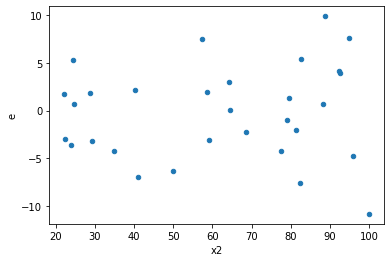

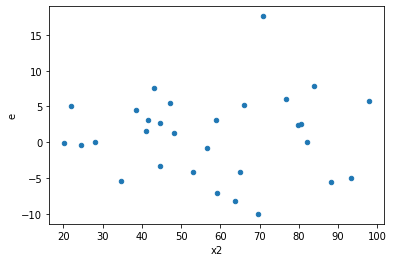

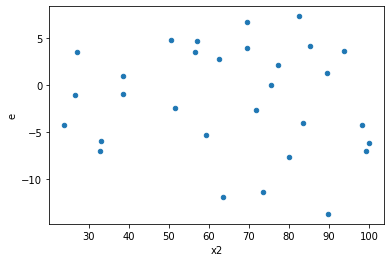

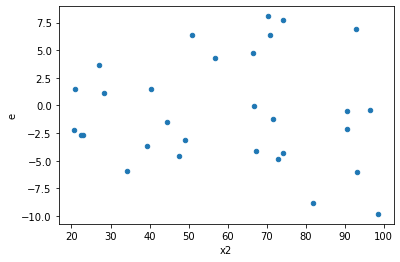

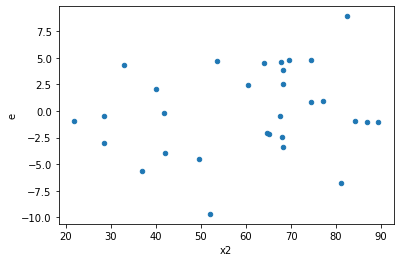

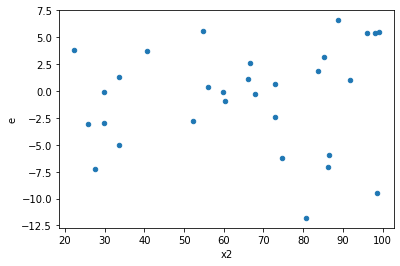

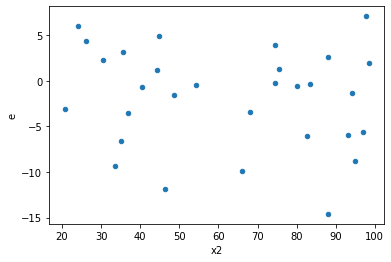

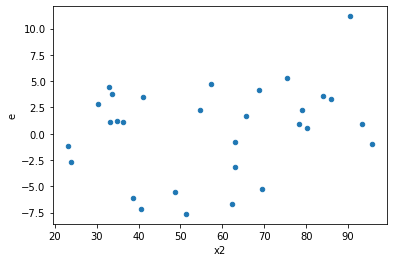

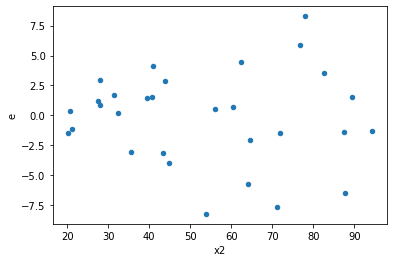

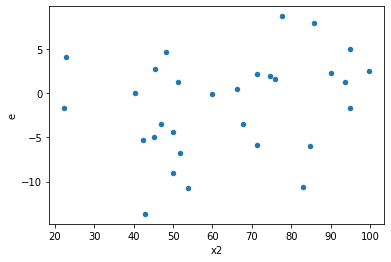

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,15.0,11.0,216.76038111960617,269.14585053163233,14.450692074640411,24.46780459378476,1.693192579802003,0.38209724548528623,0.8089513772573569,0.19104862274264311,Reject005=1 : Homoscedasticity
4.0,13.0,13.0,138.56594368048835,475.7163036073269,10.658918744652949,36.59356181594822,3.433140142315598,0.03410406841933722,0.9829479657903314,0.01705203420966861,Reject005=0 : Heteroscedasticity
7.0,11.0,15.0,224.29012046047956,346.3491514442492,20.390010950952686,23.08994342961661,1.132414469279026,0.80493505334767,0.597532473326165,0.402467526673835,Reject005=1 : Homoscedasticity
10.0,9.0,17.0,111.92322647359791,511.7804121014425,12.435914052621989,30.104730123614264,2.4207894969543458,0.11132038175184311,0.9443398091240784,0.055660190875921556,Reject005=1 : Homoscedasticity
15.0,8.0,18.0,66.66906765373109,525.97457269598,8.333633456716386,29.22080959422111,3.5063708700400023,0.02575592416472139,0.9871220379176393,0.012877962082360694,Reject005=0 : Heteroscedasticity
17.0,11.0,15.0,147.94922459977414,222.97423448759957,13.449929509070376,14.864948965839972,1.1052064589494937,0.8381457702827646,0.5809271148586177,0.4190728851413823,Reject005=1 : Homoscedasticity
20.0,12.0,14.0,102.54779101481186,694.1074680322588,8.545649251234321,49.57910485944706,5.801677953525406,0.002658224341501647,0.9986708878292492,0.0013291121707508236,Reject005=0 : Heteroscedasticity
21.0,15.0,11.0,241.6181937745,602.6060465100886,16.107879584966668,54.782367864553514,3.4009670593565513,0.046348974747829175,0.9768255126260854,0.023174487373914587,Reject005=0 : Heteroscedasticity
22.0,10.0,16.0,69.603694837873,310.3413875400557,6.960369483787299,19.39633672125348,2.7866820527894562,0.06585215559570456,0.9670739222021477,0.03292607779785228,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,14.0,343.43542608064234,269.7792239108592,28.61961884005353,19.26994456506137,0.6733124110686208,0.498183801189999,Reject005=1 : Homoscedasticity
1.0,14.0,12.0,283.46324996731653,231.0811891548196,20.247374997665467,19.256765762901633,0.9510746832674334,0.9180342537030167,Reject005=1 : Homoscedasticity
2.0,17.0,9.0,223.26483261051052,40.39566918111078,13.13322544767709,4.488407686790087,0.3417597379007884,0.05421840713941631,Reject005=1 : Homoscedasticity
3.0,15.0,11.0,216.76038111960617,269.14585053163233,14.450692074640411,24.46780459378476,1.693192579802003,0.38209724548528623,Reject005=1 : Homoscedasticity
4.0,13.0,13.0,138.56594368048835,475.7163036073269,10.658918744652949,36.59356181594822,3.433140142315598,0.03410406841933722,Reject005=0 : Heteroscedasticity
5.0,10.0,16.0,252.59329281084678,360.05218424351386,25.25932928108468,22.503261515219616,0.8908891152573505,0.8780252352104486,Reject005=1 : Homoscedasticity
6.0,9.0,17.0,261.9027402539025,269.4270369217977,29.100304472655832,15.848649230693983,0.5446214229677976,0.3552082934619811,Reject005=1 : Homoscedasticity
7.0,11.0,15.0,224.29012046047956,346.3491514442492,20.390010950952686,23.08994342961661,1.132414469279026,0.80493505334767,Reject005=1 : Homoscedasticity
8.0,10.0,16.0,315.7598637976957,425.603625240563,31.575986379769567,26.60022657753519,0.8424194974500527,0.8037210855256703,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      852
Reject005=0 : Heteroscedasticity    148
Name: Result_test, dtype: int64